In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [123]:
con = sqlite3.connect('companies.db')
df = pd.read_sql("SELECT * FROM companies", con)
df

,id,name,domain,year_founded,industry,size range,locality,country,current_employees,total_employees
0,159,global computer services llc,globcom-oman.com,1998.0,computer software,51 - 200,"burnsville, minnesota, united states",oman,24,35
1,168,noble foods co,None,None,logistics and supply chain,1 - 10,None,guernsey,1,1
2,193,ipf softwares,ipfsoftwares.com,2013.0,information technology and services,11 - 50,"dar es salaam, dar es salaam, tanzania",tanzania,5,7
3,238,adamjee group,adamjee.mu,1979.0,real estate,1 - 10,"grand baie, riviere du rempart, mauritius",mauritius,1,1
4,654,art gallery line,artgalleryline.com,2003.0,fine art,1 - 10,"tbilisi, dushet'is raioni, georgia",georgia,2,2
...,...,...,...,...,...,...,...,...,...,...
55986,7172926,kailash journeys (p) ltd.,kailashjourneys.com,1995.0,"leisure, travel & tourism",11 - 50,"kathmandu, central region, nepal",nepal,8,11
55987,7172949,iab macedonia,iab.mk,2012.0,marketing and advertising,1 - 10,"skopje, karpoš, macedonia",macedonia,2,2
55988,7172980,mora&ortega advocats,None,1993.0,law practice,1 - 10,"andorra la vella, andorra la vella, andorra",andorra,1,2
55989,7173096,union of banks of armenia,uba.am,1995.0,banking,1 - 10,"yerevan, yerevan, armenia",armenia,2,6


In [124]:
df = df.drop(columns = ['domain', 'locality'])
df = df.drop_duplicates()
df = df.dropna()
df

,id,name,year_founded,industry,size range,country,current_employees,total_employees
0,159,global computer services llc,1998.0,computer software,51 - 200,oman,24,35
2,193,ipf softwares,2013.0,information technology and services,11 - 50,tanzania,5,7
3,238,adamjee group,1979.0,real estate,1 - 10,mauritius,1,1
4,654,art gallery line,2003.0,fine art,1 - 10,georgia,2,2
5,673,sama al andalus,2011.0,pharmaceuticals,1 - 10,libya,1,1
...,...,...,...,...,...,...,...,...
55986,7172926,kailash journeys (p) ltd.,1995.0,"leisure, travel & tourism",11 - 50,nepal,8,11
55987,7172949,iab macedonia,2012.0,marketing and advertising,1 - 10,macedonia,2,2
55988,7172980,mora&ortega advocats,1993.0,law practice,1 - 10,andorra,1,2
55989,7173096,union of banks of armenia,1995.0,banking,1 - 10,armenia,2,6


In [125]:
df.isnull().any()

id                   False
name                 False
year_founded         False
industry             False
size range           False
country              False
current_employees    False
total_employees      False
dtype: bool

In [126]:
df = df.rename(columns = {'name' : 'Name', 'year_founded' : 'Year Founded',
                          'industry' : 'Job', 'size range' : 'Size Range',
                          'country' : 'Country', 'current_employees' : 'Current Employees',
                          'total_employees' : 'Total Employees'})
df

,id,Name,Year Founded,Job,Size Range,Country,Current Employees,Total Employees
0,159,global computer services llc,1998.0,computer software,51 - 200,oman,24,35
2,193,ipf softwares,2013.0,information technology and services,11 - 50,tanzania,5,7
3,238,adamjee group,1979.0,real estate,1 - 10,mauritius,1,1
4,654,art gallery line,2003.0,fine art,1 - 10,georgia,2,2
5,673,sama al andalus,2011.0,pharmaceuticals,1 - 10,libya,1,1
...,...,...,...,...,...,...,...,...
55986,7172926,kailash journeys (p) ltd.,1995.0,"leisure, travel & tourism",11 - 50,nepal,8,11
55987,7172949,iab macedonia,2012.0,marketing and advertising,1 - 10,macedonia,2,2
55988,7172980,mora&ortega advocats,1993.0,law practice,1 - 10,andorra,1,2
55989,7173096,union of banks of armenia,1995.0,banking,1 - 10,armenia,2,6


In [127]:
df['Year Founded'] = df['Year Founded'].str.split(pat = '.').str[0]
df

,id,Name,Year Founded,Job,Size Range,Country,Current Employees,Total Employees
0,159,global computer services llc,1998,computer software,51 - 200,oman,24,35
2,193,ipf softwares,2013,information technology and services,11 - 50,tanzania,5,7
3,238,adamjee group,1979,real estate,1 - 10,mauritius,1,1
4,654,art gallery line,2003,fine art,1 - 10,georgia,2,2
5,673,sama al andalus,2011,pharmaceuticals,1 - 10,libya,1,1
...,...,...,...,...,...,...,...,...
55986,7172926,kailash journeys (p) ltd.,1995,"leisure, travel & tourism",11 - 50,nepal,8,11
55987,7172949,iab macedonia,2012,marketing and advertising,1 - 10,macedonia,2,2
55988,7172980,mora&ortega advocats,1993,law practice,1 - 10,andorra,1,2
55989,7173096,union of banks of armenia,1995,banking,1 - 10,armenia,2,6


In [128]:
df = df.astype({'Year Founded' : 'int', 'Current Employees' : 'int',
                'Total Employees' : 'int'})

In [129]:
df.dtypes

id                    int64
Name                 object
Year Founded          int64
Job                  object
Size Range           object
Country              object
Current Employees     int64
Total Employees       int64
dtype: object

C:\Users\sakhtafzar\AppData\Local\Temp\ipykernel_2508\362917965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Country'].value_counts().index,


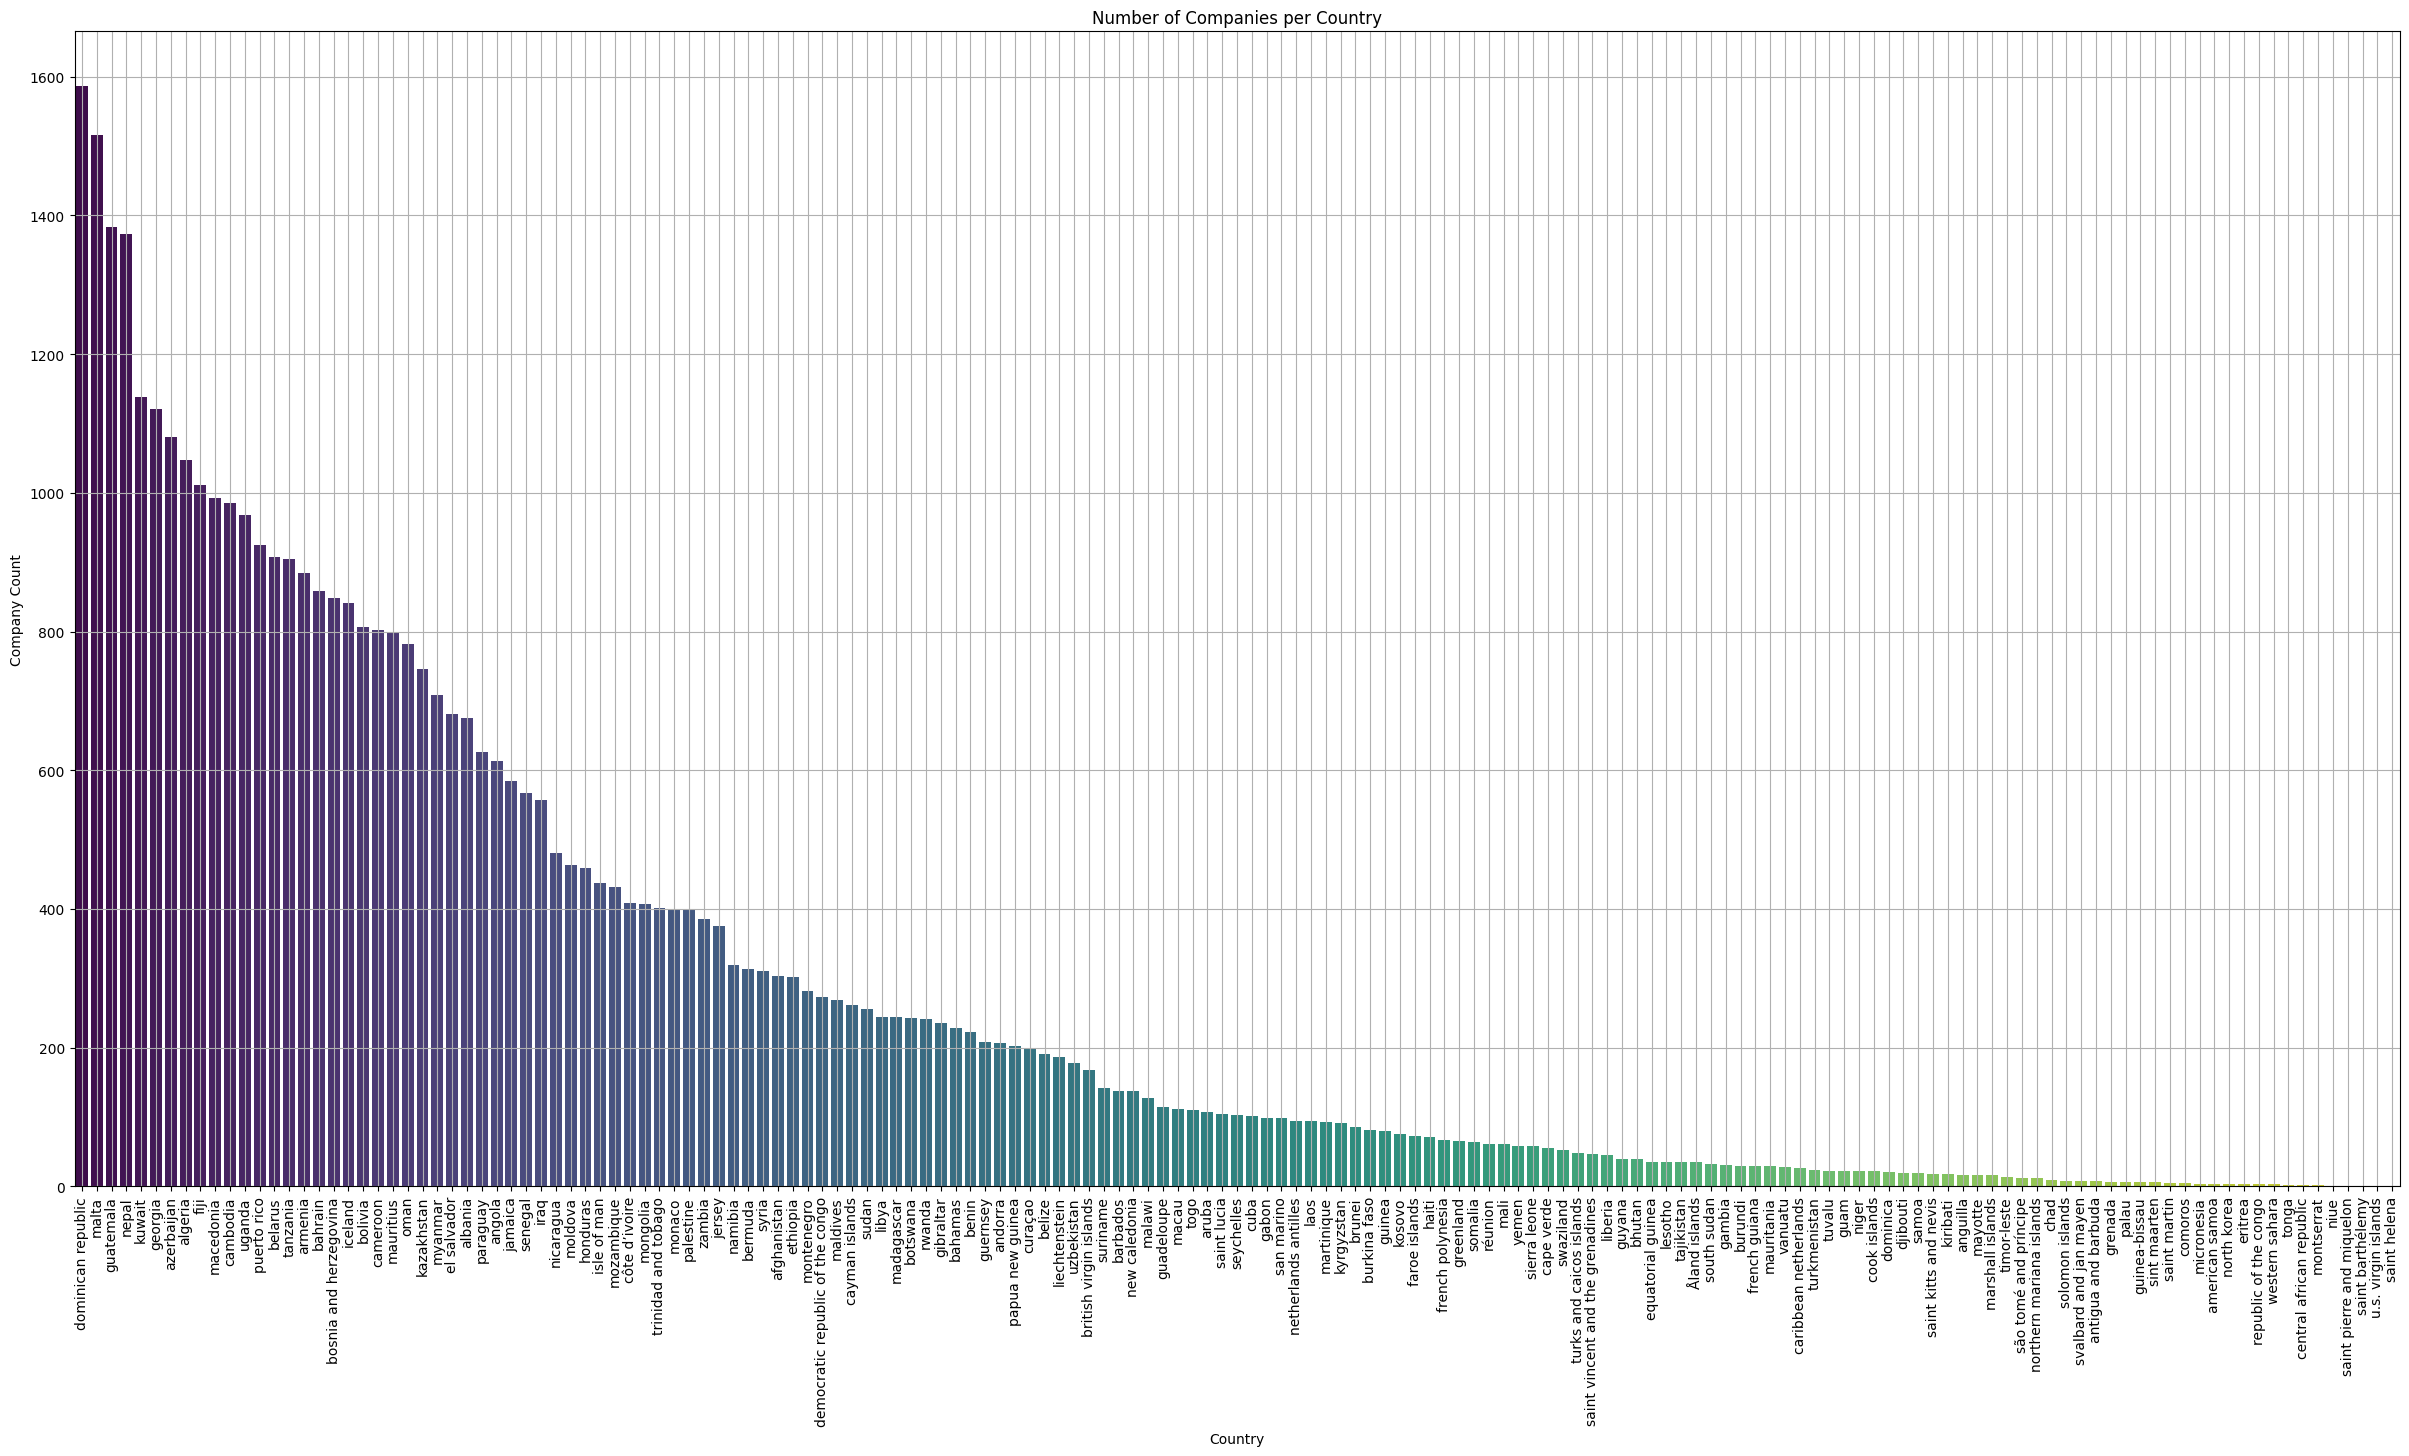

In [130]:
plt.figure(figsize = (30, 15))
sns.barplot(x = df['Country'].value_counts().index,
            y = df['Country'].value_counts().values,
            palette = 'viridis')
plt.title('Number of Companies per Country')
plt.xlabel('Country')
plt.ylabel('Company Count')
plt.xticks(rotation = 90)
plt.grid(True)

Text(0.5, 1.0, 'Company Size Distribution')

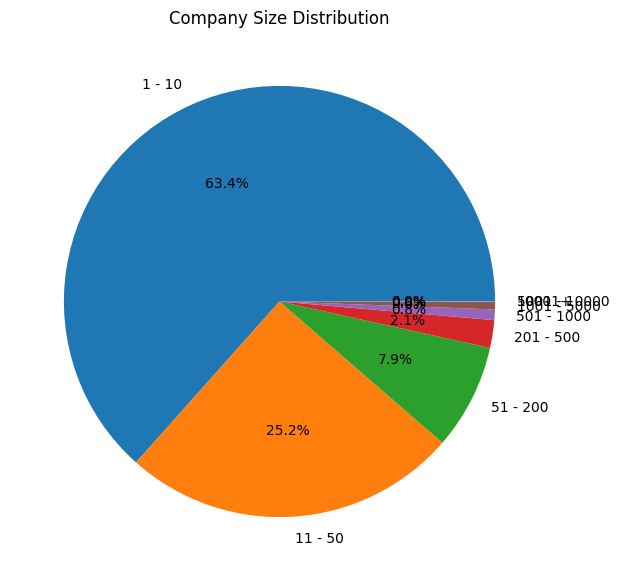

In [131]:
size_count = df['Size Range'].value_counts()

plt.figure(figsize = (7, 7))
plt.pie(size_count, labels = size_count.index,
        autopct = '%1.1f%%')
plt.title('Company Size Distribution')

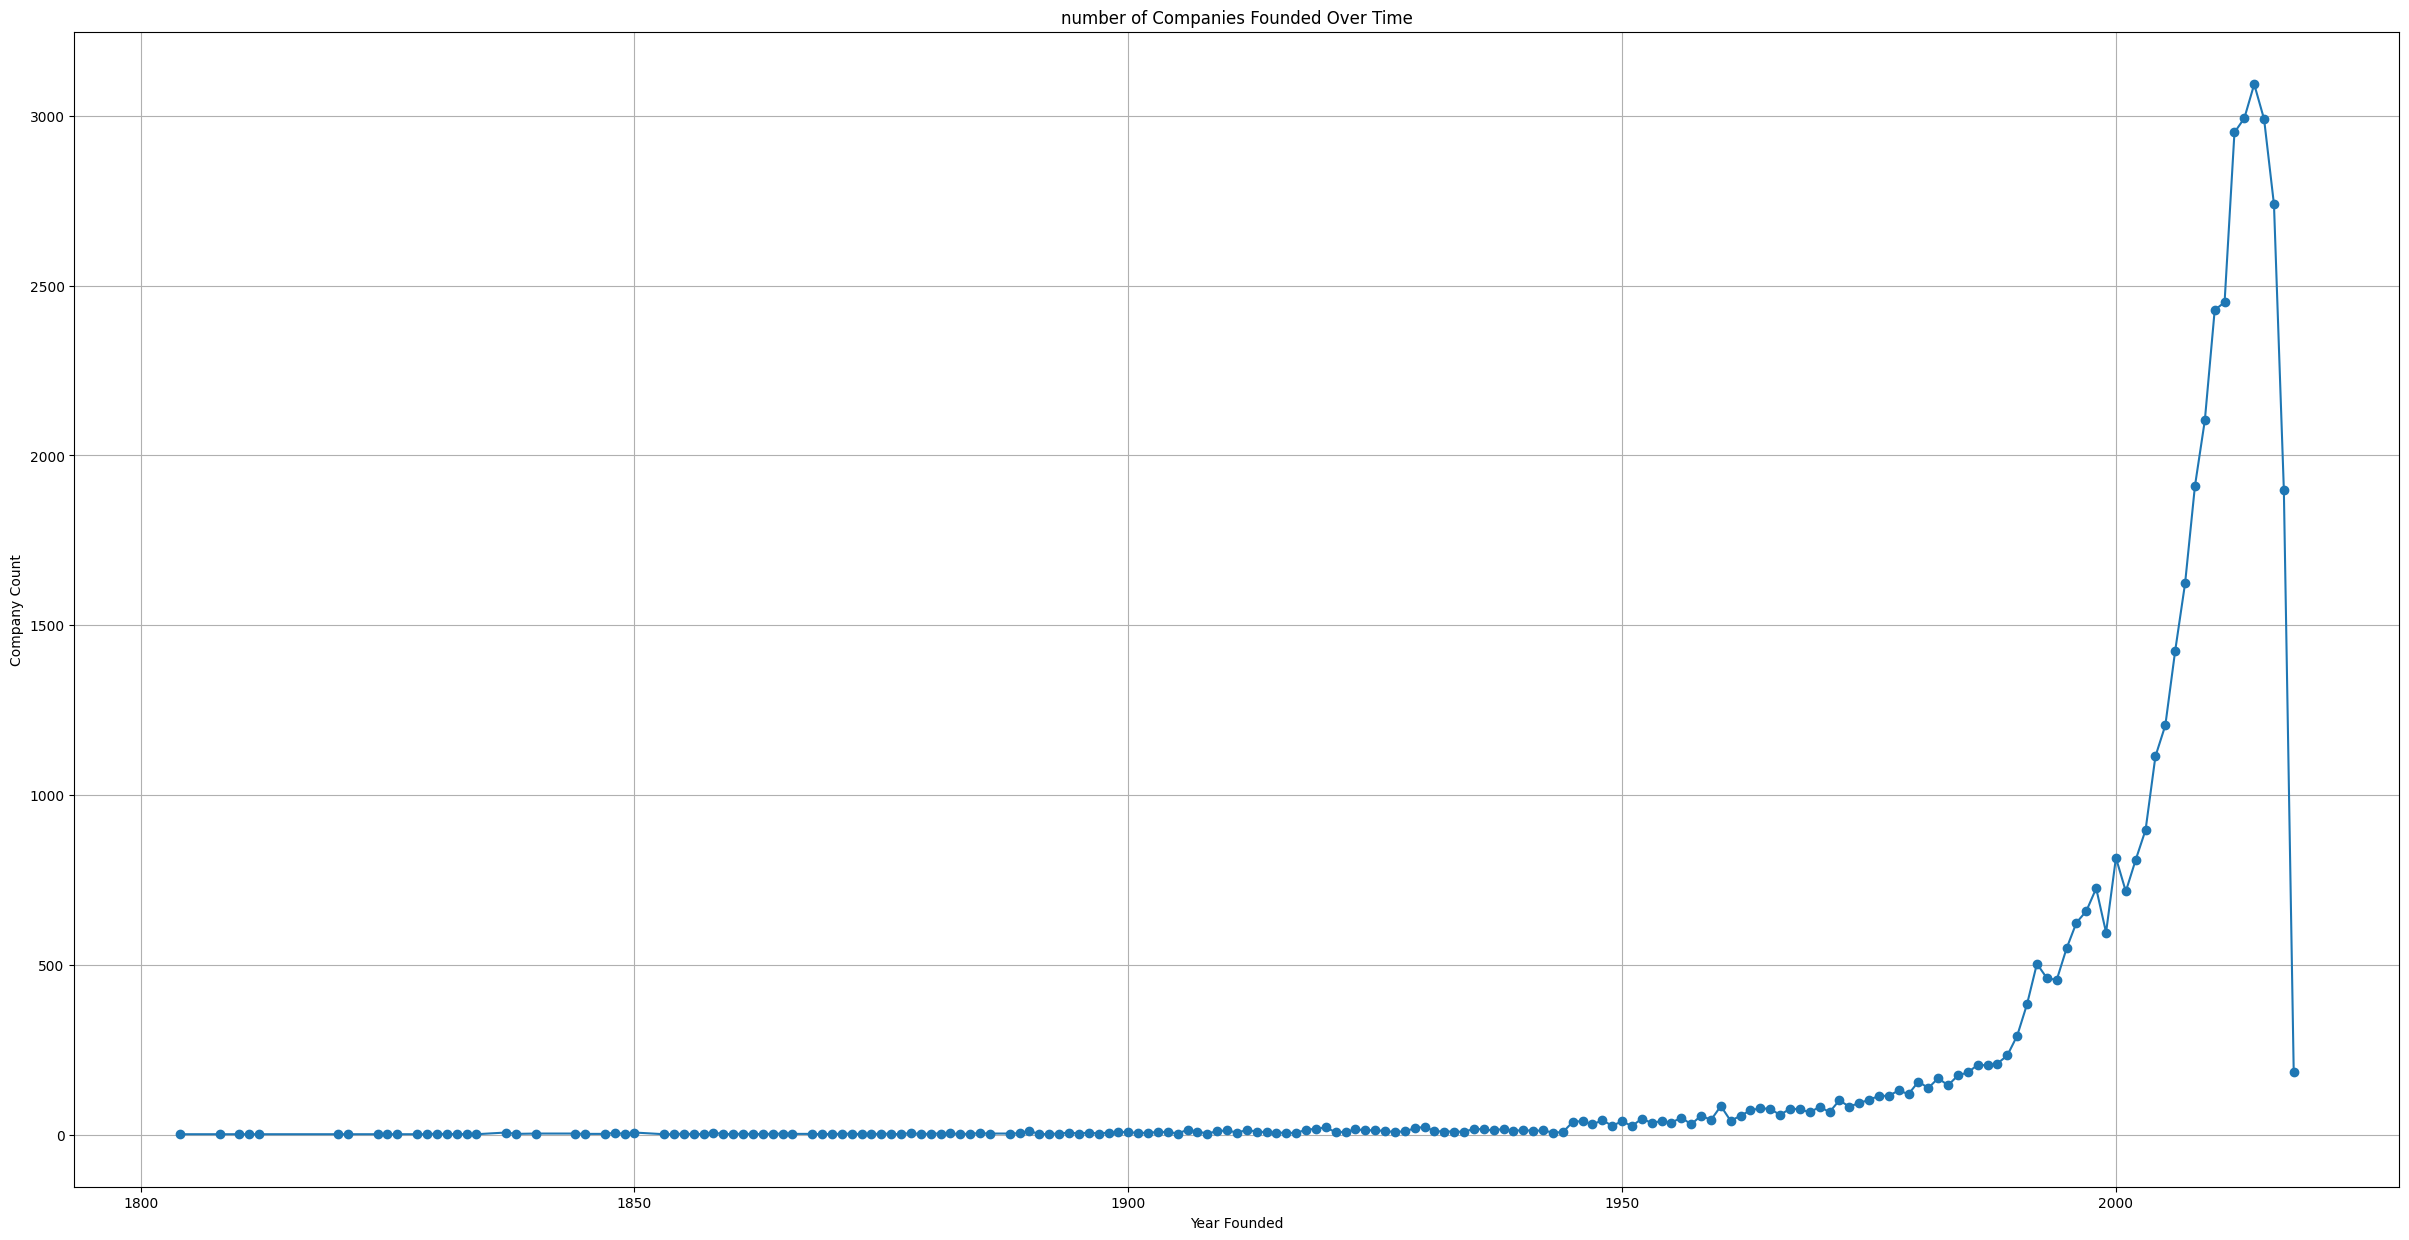

In [132]:
year_count = df['Year Founded'].value_counts().sort_index()

plt.figure(figsize = (30, 15))
plt.plot(year_count.index, year_count.values,
         marker = 'o', linestyle = '-')
plt.title('number of Companies Founded Over Time')
plt.xlabel('Year Founded')
plt.ylabel('Company Count')
plt.grid(True)

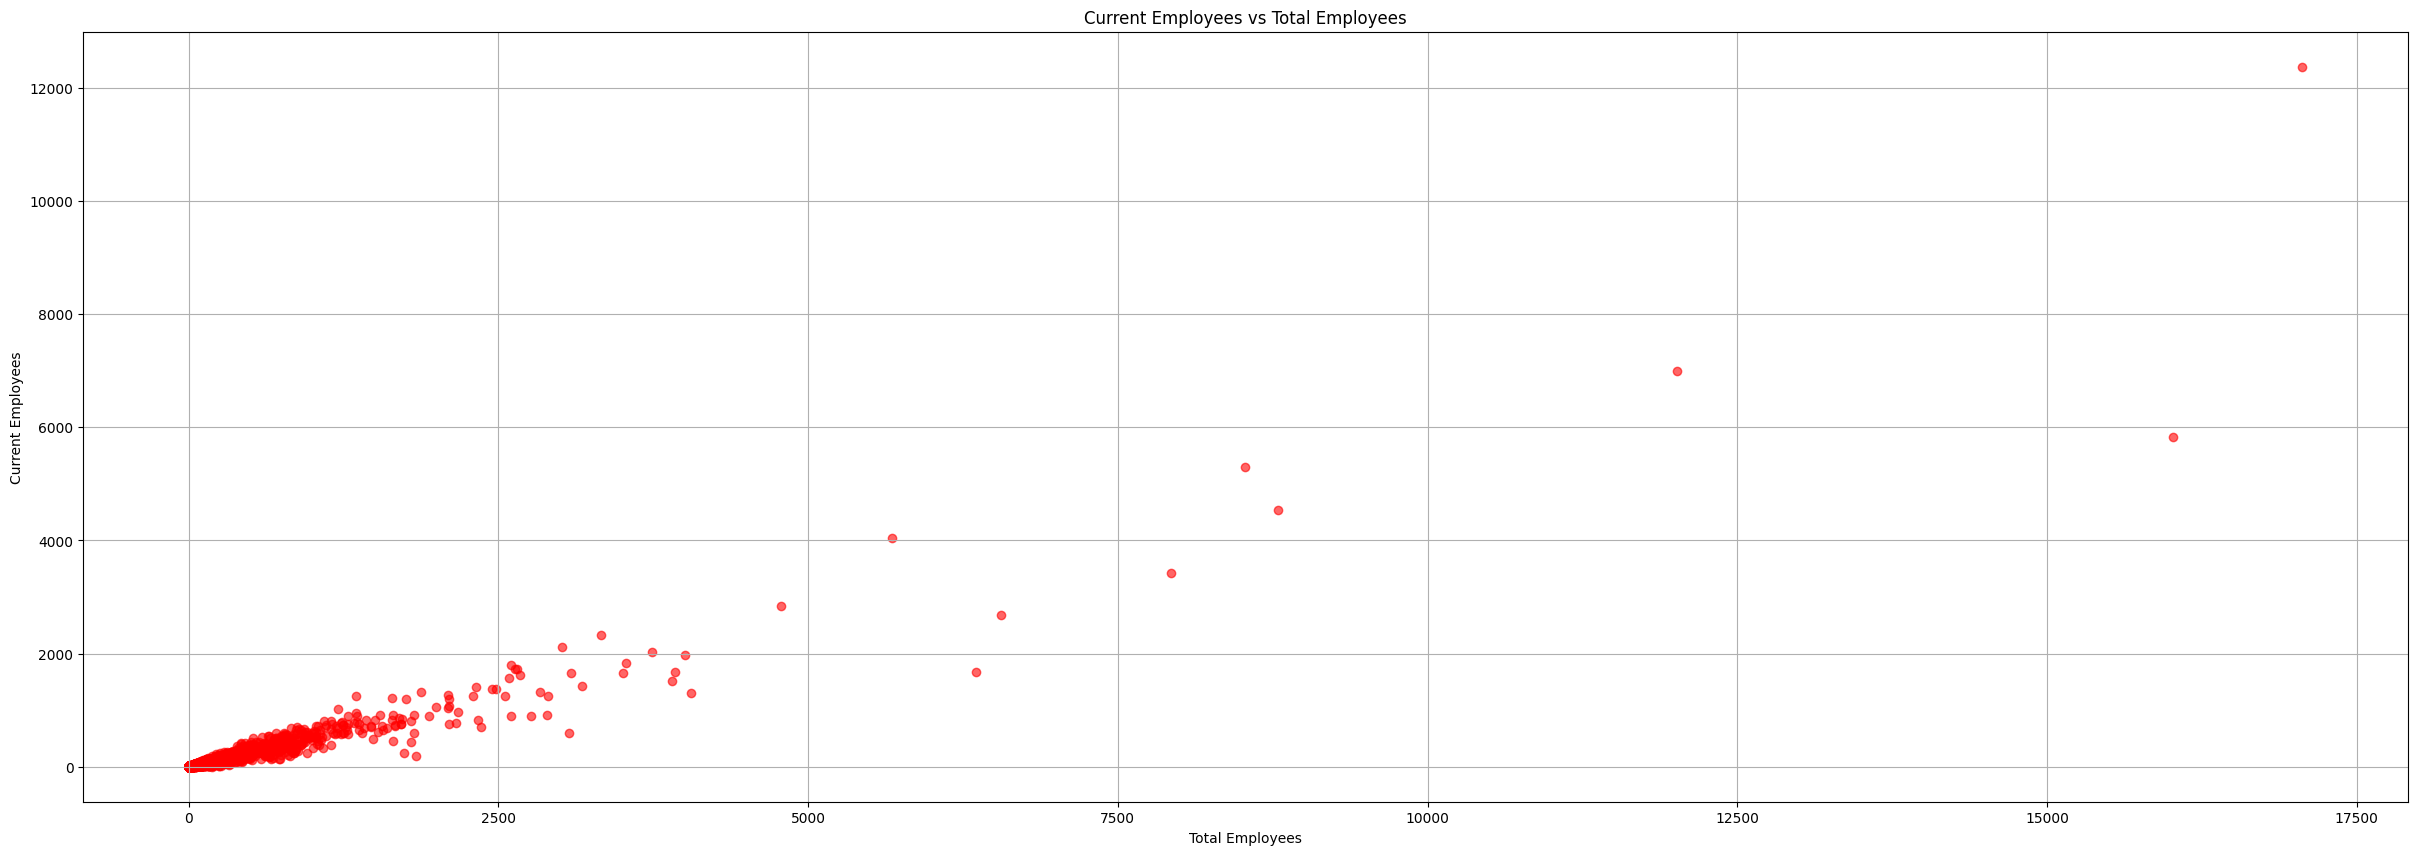

In [133]:
plt.figure(figsize = (30, 10))
plt.scatter(df['Total Employees'], df['Current Employees'],
            alpha = 0.6, color = 'r')
plt.title('Current Employees vs Total Employees')
plt.xlabel('Total Employees')
plt.ylabel('Current Employees')
plt.grid(True)

C:\Users\sakhtafzar\AppData\Local\Temp\ipykernel_2508\1218704243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Job'].value_counts().index[:10],


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'information technology and services'),
  Text(1, 0, 'marketing and advertising'),
  Text(2, 0, 'financial services'),
  Text(3, 0, 'computer software'),
  Text(4, 0, 'management consulting'),
  Text(5, 0, 'leisure, travel & tourism'),
  Text(6, 0, 'construction'),
  Text(7, 0, 'internet'),
  Text(8, 0, 'hospitality'),
  Text(9, 0, 'education management')])

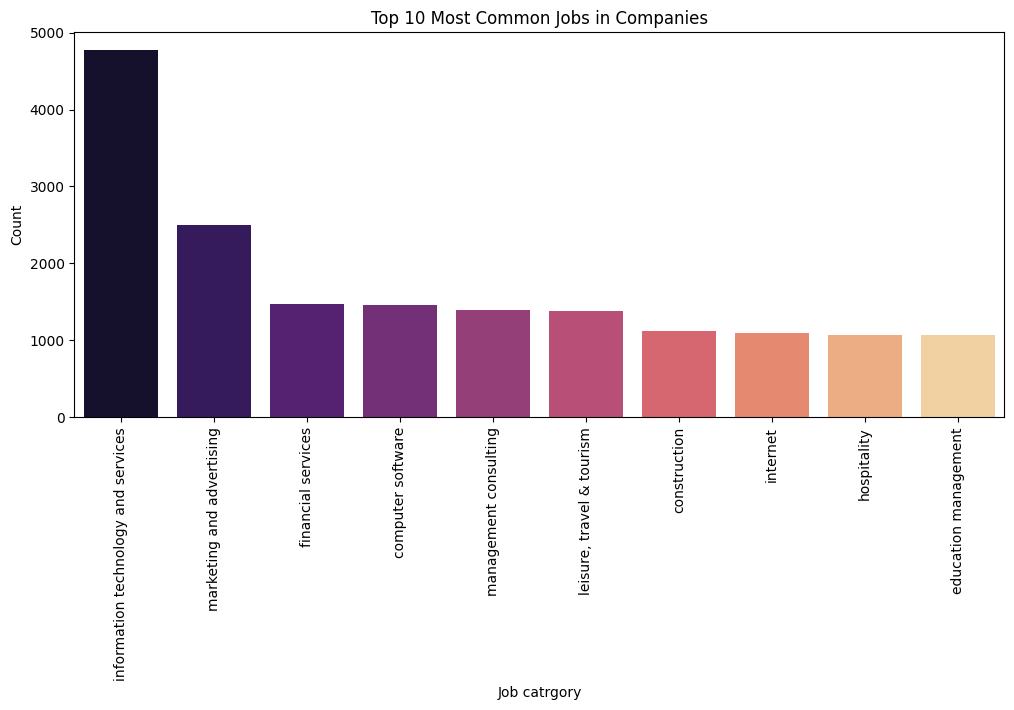

In [134]:
plt.figure(figsize = (12, 5))
sns.barplot(x = df['Job'].value_counts().index[:10],
            y = df['Job'].value_counts().values[:10],
            palette = 'magma')
plt.title('Top 10 Most Common Jobs in Companies')
plt.xlabel('Job catrgory')
plt.ylabel('Count')
plt.xticks(rotation = 90)

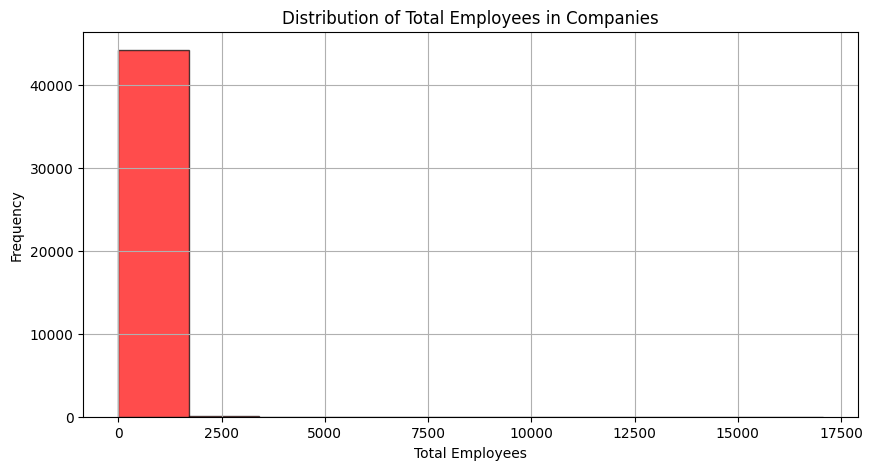

In [135]:
plt.figure(figsize = (10, 5))
plt.hist(df['Total Employees'], bins = 10,
         color = 'red', edgecolor = 'black', alpha = 0.7)
plt.title('Distribution of Total Employees in Companies')
plt.xlabel('Total Employees')
plt.ylabel('Frequency')
plt.grid(True)

C:\Users\sakhtafzar\AppData\Local\Temp\ipykernel_2508\1455321938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['Country'],


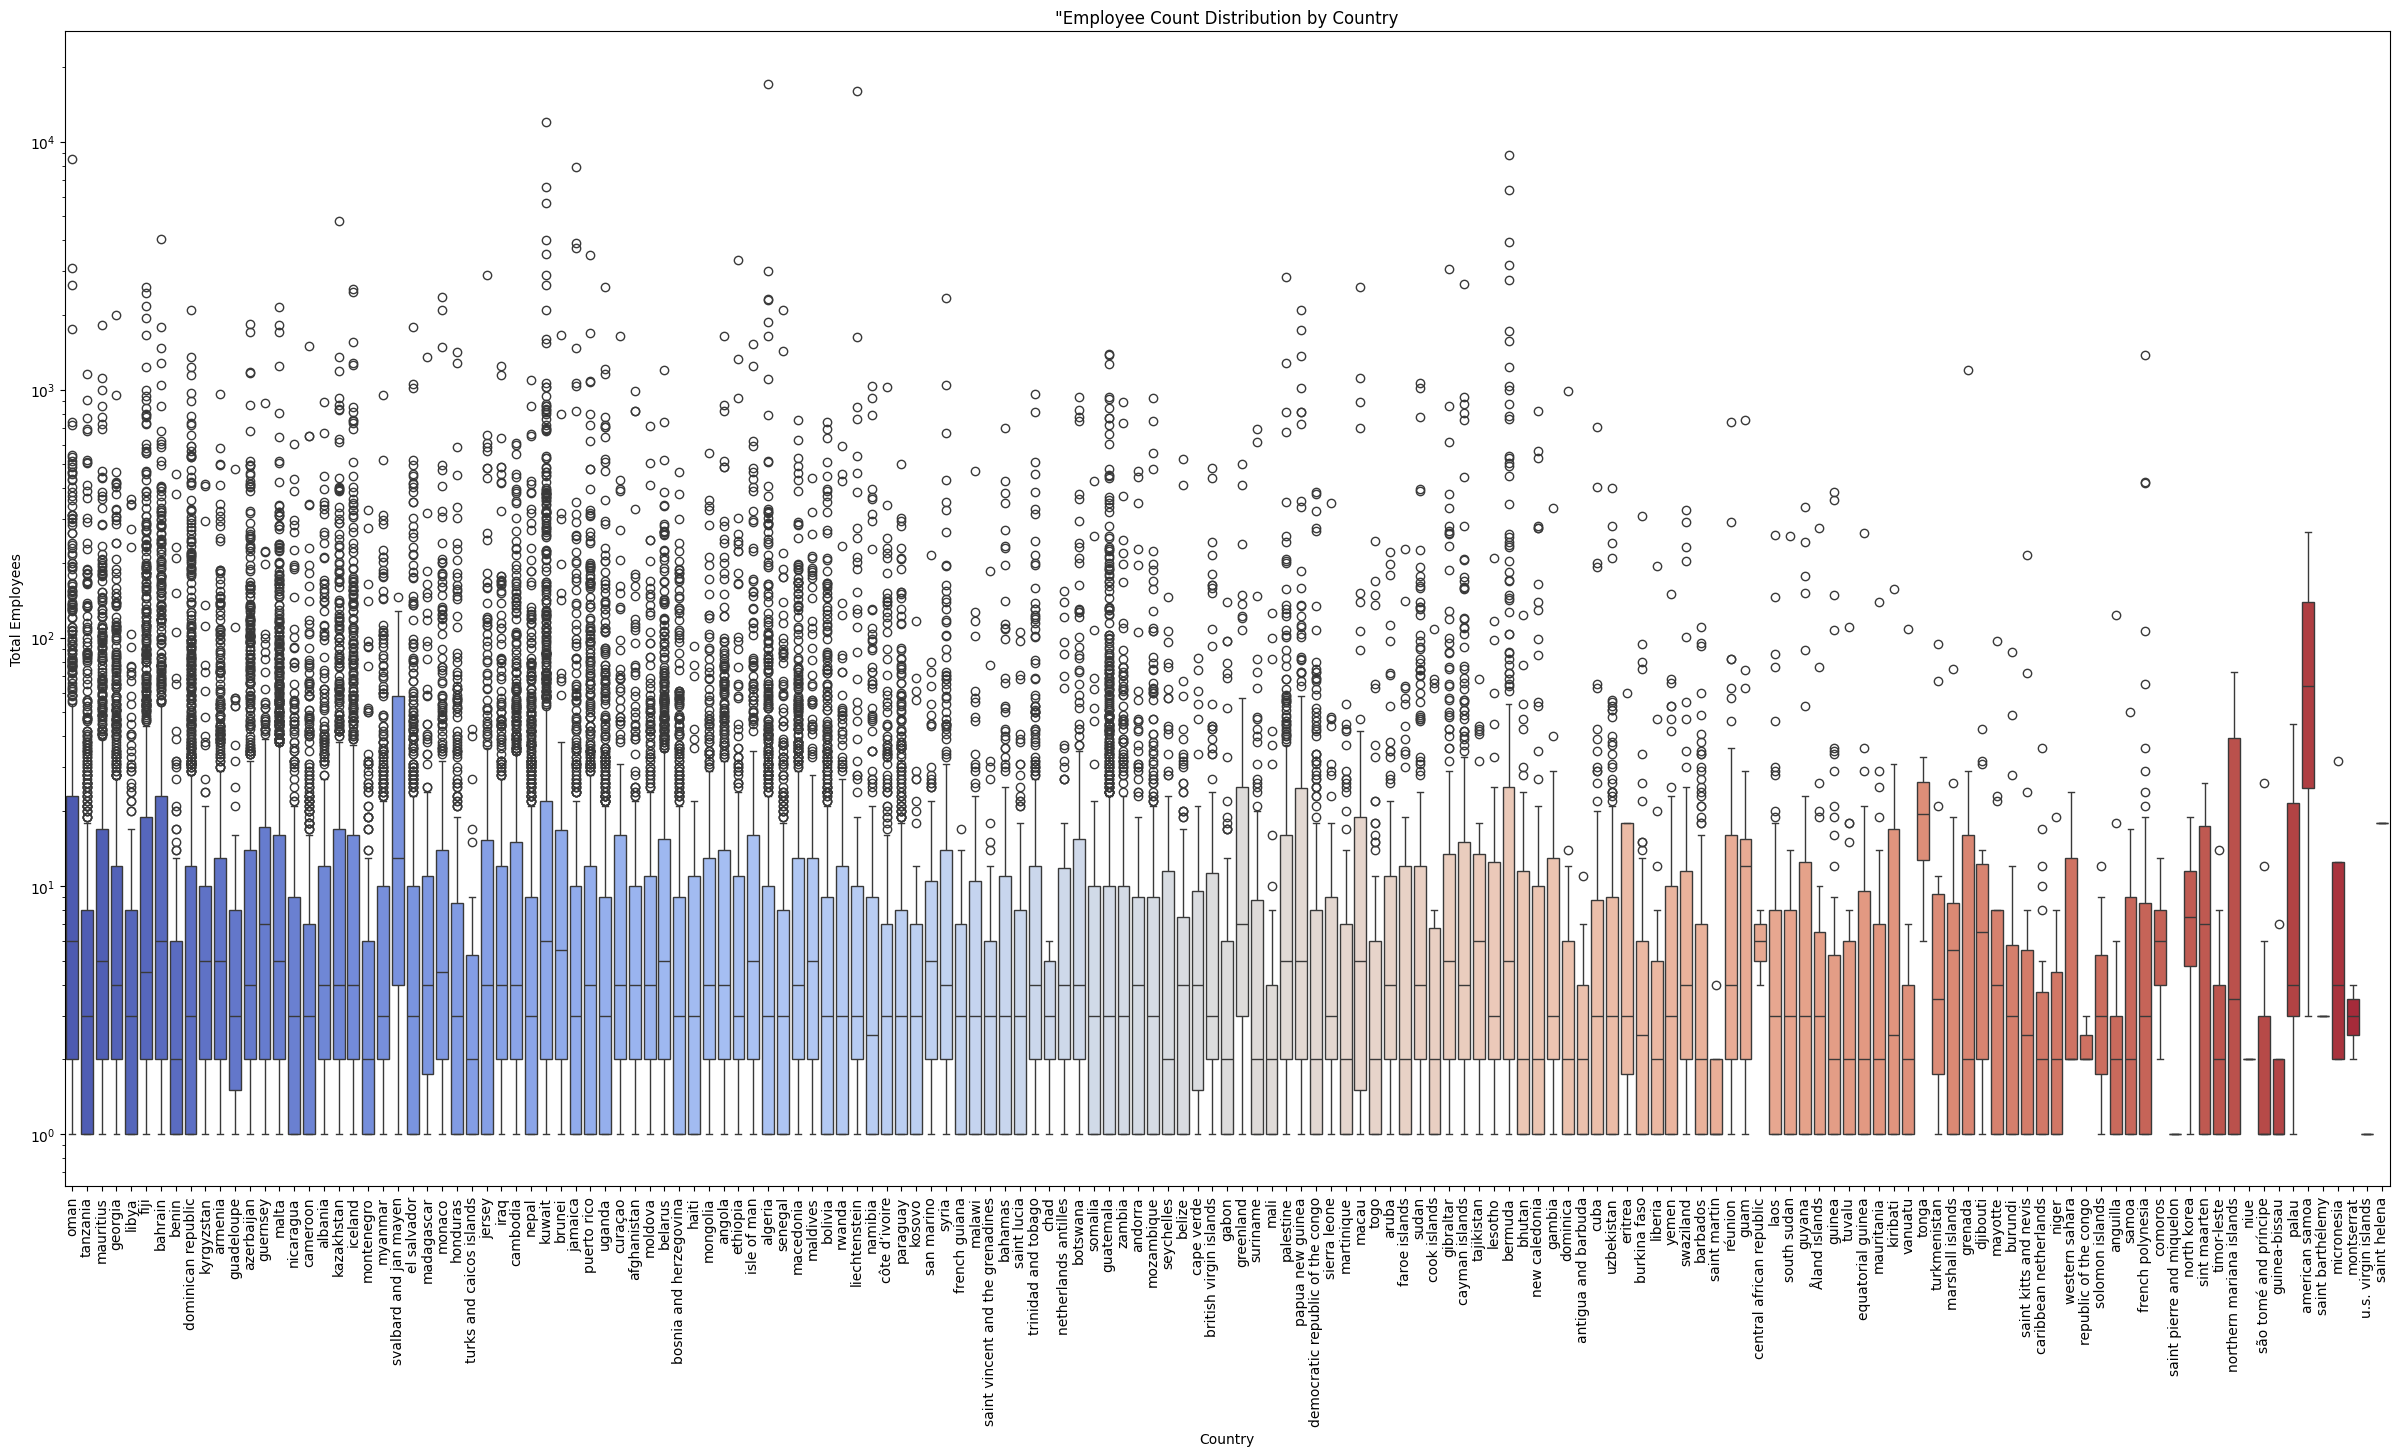

In [ ]:
plt.figure(figsize = (30, 15))
sns.boxplot(x = df['Country'],
            y = df['Total Employees'], palette= 'coolwarm')
plt.title('"Employee Count Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Total Employees')
plt.xticks(rotation = 90)
plt.yscale('log')